# Logistic Regreesion（逻辑回归）

* 选用kernel learning_dl
~~~
conda activate learning_dl 

pip install scipy

# conda remove --name learning_dl --all
~~~

In [1]:
import pandas as pd
import seaborn as sns
# sns.set(context="notebook", style="whitegrid", palette="dark")
import matplotlib.pyplot as plt
# import tensorflow as tf
import numpy as np

print("finish import module!!!")

finish import module!!!


In [2]:
#读入数据并查看数据的形式
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
print(data)

        exam1      exam2  admitted
0   34.623660  78.024693         0
1   30.286711  43.894998         0
2   35.847409  72.902198         0
3   60.182599  86.308552         1
4   79.032736  75.344376         1
..        ...        ...       ...
95  83.489163  48.380286         1
96  42.261701  87.103851         1
97  99.315009  68.775409         1
98  55.340018  64.931938         1
99  74.775893  89.529813         1

[100 rows x 3 columns]


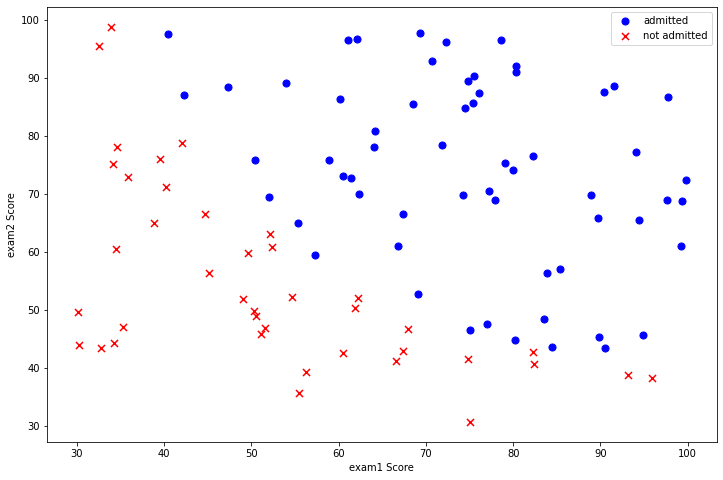

In [3]:
# 把数据以散点图的形式画出来（正样本为被接纳，负样本就是不被接纳）
positive = data[data['admitted'].isin([1])]
negative = data[data['admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['exam1'], positive['exam2'], s=50, c='b', marker='o', label='admitted')
ax.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='not admitted')
ax.legend()
ax.set_xlabel('exam1 Score')
ax.set_ylabel('exam2 Score')
plt.show()

# 定义sigmoid 函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： 
$$g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$$

并有：$$z={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$$
合起来，我们得到逻辑回归模型的假设函数： 
	$${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}} $$

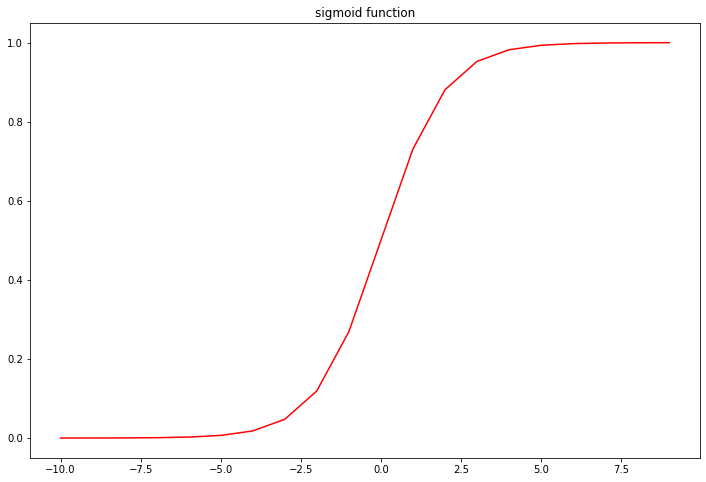

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 画出sigmoid函数
nums = np.arange(-10, 10, step=1)#生成-10到10的等差数列

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')
ax.title.set_text('sigmoid function')
plt.show()

# 实现逻辑回归的代价函数

$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$


In [5]:
# 实现逻辑回归的代价函数
def cost(theta, X, y):
    # 转换成矩阵
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [6]:
# 在数据集中加入一列，使得数据集可以进行矩阵运算
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)
print(data)

    Ones      exam1      exam2  admitted
0      1  34.623660  78.024693         0
1      1  30.286711  43.894998         0
2      1  35.847409  72.902198         0
3      1  60.182599  86.308552         1
4      1  79.032736  75.344376         1
..   ...        ...        ...       ...
95     1  83.489163  48.380286         1
96     1  42.261701  87.103851         1
97     1  99.315009  68.775409         1
98     1  55.340018  64.931938         1
99     1  74.775893  89.529813         1

[100 rows x 4 columns]


In [7]:
# 获取训练数据，特征X和标签y
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays
X = np.array(X.values)
y = np.array(y.values)

# initalize the parameter array theta(初始化参数)
# theta = np.zeros(3)
theta = np.array([0,0,0])

In [8]:
print("theta",theta)

print("X.shape: ",X.shape, "theta.shape: ", theta.shape, "y.shape: ", y.shape)

theta [0 0 0]
X.shape:  (100, 3) theta.shape:  (3,) y.shape:  (100, 1)


# 定义梯度下降函数
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$
其中:
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$
那么有:

$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [9]:
# 定义梯度下降函数
def gradientDescent(X, y, theta, lr=0.01, iters=1000):  # 学习率默认0.01，迭代次数默认1000
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    temp = np.matrix(np.zeros(theta.shape))#初始化一个临时矩阵用于存放更新后的theta
    parameters = int(theta.ravel().shape[1])#参数theta的个数：ravel()将theta转为一维数组，shape[1]取列数
    cost_values = np.zeros(iters)#用于存放每次迭代后的cost

    # 遍历iters代
    for i in range(iters):
        error = sigmoid(X * theta.T) - y  # 当前的误差

        # 遍历每个参数都分别进行更新
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - (lr * (np.sum(term) / len(X)))  # 更新后的 theta

        theta = temp # 更新权重
        cost_values[i] = cost(theta, X, y)  # 计算当前 cost

    return theta, cost_values  # (注意此处的 cost 是保留所有的 cost)

# 调用函数
w, all_cost = gradientDescent(X, y, theta)
print("final theta:", w)
print("final cost:", cost(w, X, y))

final theta: [[-0.76754116  0.35868899 -0.11012487]]
final cost: 4.764248583140835


/home/gwp/miniconda3/envs/learning_dl/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/gwp/miniconda3/envs/learning_dl/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


In [10]:
#从上面结果来看,效果并不是很好，改为采用SciPy's truncated newton（TNC）实现寻找最优参数。
def gradient(theta, X, y):
    # 转换成矩阵
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])#参数theta的个数：ravel()将theta转为一维数组，shape[1]取列数
    grad = np.zeros(parameters)#每个参数对应的梯度
    
    error = sigmoid(X * theta.T) - y #当前的误差
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
print("result:",result)
print("final cost:", cost(result[0], X, y))

result: (array([-25.16131859,   0.20623159,   0.20147149]), 36, 0)
final cost: 0.20349770158947472


In [19]:
#进行分类预测
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability] #返回预测的类别,当大于0.5时，预测为1，否则为0


trained_theta = np.matrix(result[0])
print(trained_theta)
predictions = predict(trained_theta, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))


[[-25.16131859   0.20623159   0.20147149]]
accuracy = 89%


In [21]:
# 画出决策边界
# 使用 scipy.optimize.minimize 去寻找参数
res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient)
print(res.x)

final_theta = np.matrix(res.x)#注意要转换为矩阵的模式
y_pred = predict(final_theta, X)
from sklearn.metrics import classification_report#这个包是评价报告
print(classification_report(y, y_pred))

[-25.15993917   0.20622056   0.20146032]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



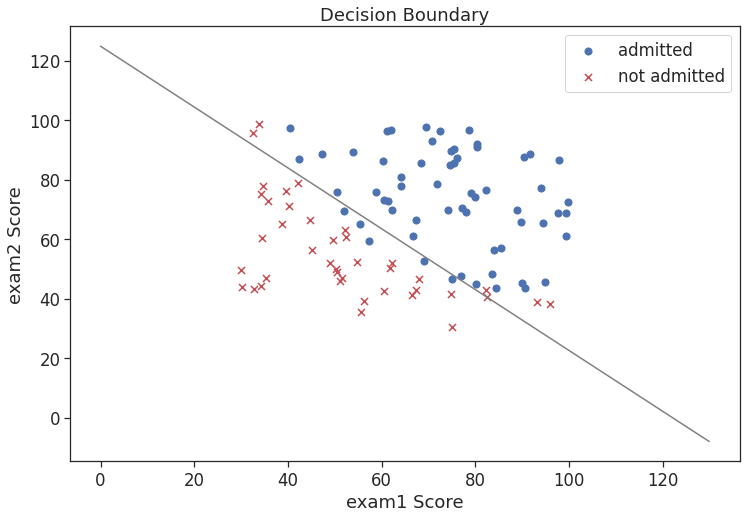

In [26]:
positive = data[data['admitted'].isin([1])]
negative = data[data['admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['exam1'], positive['exam2'], s=50, c='b', marker='o', label='admitted')
ax.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='not admitted')


coef = -(res.x / res.x[2])  # find the equation
x_temp = np.arange(130, step=0.1)
y_temp = coef[0] + coef[1]*x_temp

plt.plot(x_temp, y_temp, 'grey')
ax.legend()
ax.set_xlabel('exam1 Score')
ax.set_ylabel('exam2 Score')
plt.title('Decision Boundary')
plt.show()